In [20]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# example data
data = {
    'area':      [1500, 1800, 2400, 3000, 3500, 4000, 2800, 3200, 3600, 4200],
    'bedrooms':  [3, 3, 4, 4, 5, 5, 4, 4, 5, 6],
    'bathrooms': [2, 2, 3, 3, 4, 4, 3, 3, 4, 5],
    'stories':   [1, 2, 2, 2, 3, 3, 2, 2, 3, 3],
    'garage':    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
    'price':     [75, 85, 110, 130, 150, 165, 120, 125, 155, 180]  
}

df = pd.DataFrame(data)

In [6]:
df.head()

,area,bedrooms,bathrooms,stories,garage,price
0,1500,3,2,1,1,75
1,1800,3,2,2,1,85
2,2400,4,3,2,1,110
3,3000,4,3,2,1,130
4,3500,5,4,3,1,150


In [18]:
# normalize features
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'garage']]
X = (X - X.mean()) / X.std()
y = df['price'].values.reshape(-1, 1)  # reshape for matrix operations

In [8]:
# add column of ones for intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape: (n_samples, n_features + 1)

In [13]:
# initializing theta
theta = np.zeros((X_b.shape[1],1))  # shape: (n_features + 1,)

In [14]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
# hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = X_b.shape[0]  # number of samples

In [19]:
loss_history = []
for i in range(n_iterations):
    y_pred = X_b.dot(theta)
    error = y_pred - y
    gradients = (2/m) * X_b.T.dot(error)
    theta = theta - learning_rate * gradients

    mse = np.mean(error**2)
    loss_history.append(mse)

Learned Coefficients:
Intercept (b0): 129.5000
b1: 18.4490
b2: 6.5890
b3: 6.5890
b4: 2.6773
b5: 1.0738


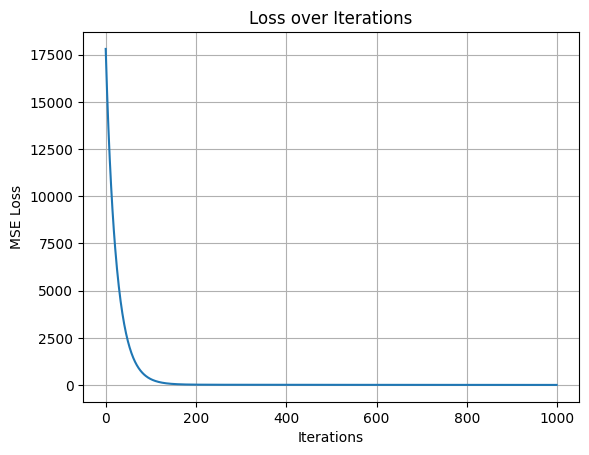

In [21]:
print("Learned Coefficients:")
print(f"Intercept (b0): {theta[0][0]:.4f}")
for i in range(1, theta.shape[0]):
    print(f"b{i}: {theta[i][0]:.4f}")

plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss over Iterations")
plt.grid(True)
plt.show()

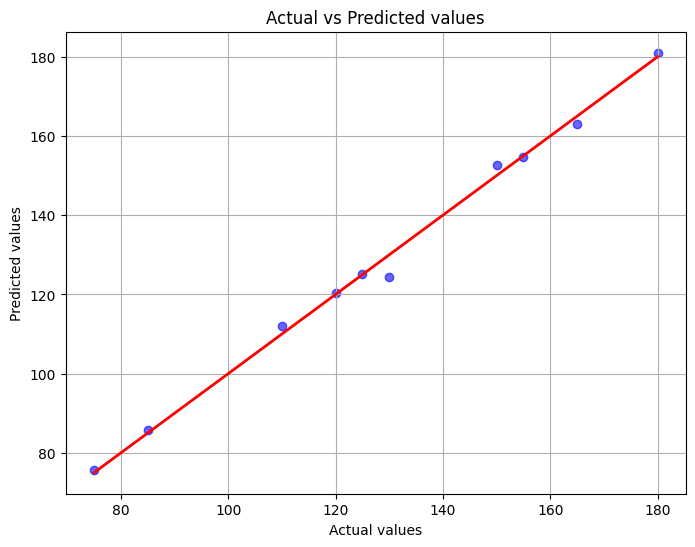

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # perfect prediction line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.grid(True)
plt.show()

In [23]:
df_results = pd.DataFrame({
    'Actual': y.flatten(),
    'Predicted': y_pred.flatten()
})
print(df_results.head())


   Actual   Predicted
0      75   75.641733
1      85   85.806343
2     110  112.090566
3     130  124.479517
4     150  152.669050


In [24]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.losses = []
    
    def _standardize(self, X):
        return (X - X.mean(axis=0)) / X.std(axis=0)
    
    def fit(self, X, y):
        X = self._standardize(X)
        self.X = X 
        y = y.reshape(-1, 1)

        n_samples, n_features = X.shape

        # add bias term
        X_b = np.c_[np.ones((n_samples, 1)), X]
        self.X_b = X_b

        self.weights = np.zeros((n_features + 1, 1))  # shape: (n_features + 1, 1)

        # GD
        for _ in range(self.n_iters):
            y_pred = X_b @ self.weights
            error = y_pred - y

            gradients = (2/n_samples) * X_b.T @ error
            self.weights -= self.learning_rate * gradients

            loss = np.mean(error**2)
            self.losses.append(loss)
    
    def predict(self, X):
        X = self._standardize(X)
        n_samples = X.shape[0]
        X_b = np.hstack([np.ones((n_samples, 1)), X])
        return X_b @ self.weights

    def plot_predictions(self, y_actual, y_pred):
        plt.figure(figsize=(8,6))
        plt.scatter(y_actual, y_pred, color='blue', alpha=0.6)
        plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red')
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted Values")
        plt.grid(True)
        plt.show()

    def plot_loss(self):
        plt.plot(self.losses)
        plt.title("Loss vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("MSE Loss")
        plt.grid(True)
        plt.show()

In [25]:
model = LinearRegression(learning_rate=0.01, n_iters=1000)
model.fit(X, y)
y_pred = model.predict(X)

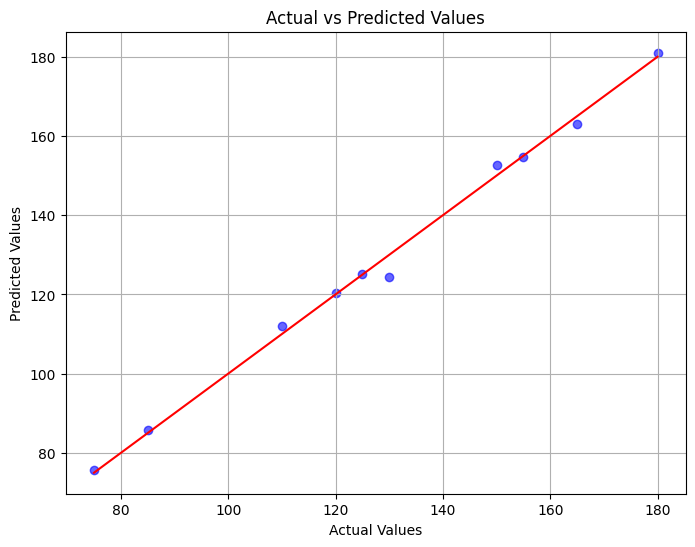

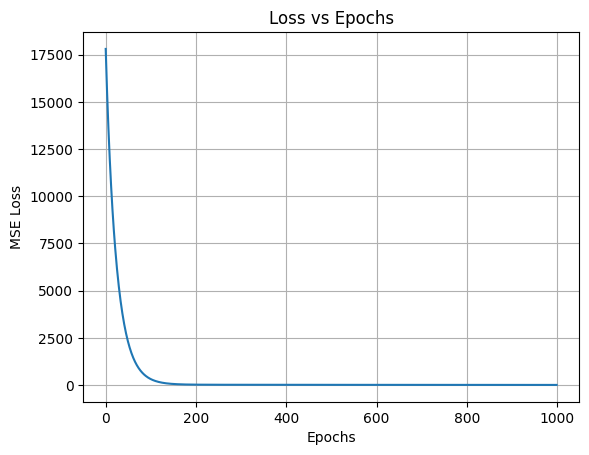

In [26]:
model.plot_predictions(y, y_pred)
model.plot_loss()